## Imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### The function to solve:

In [2]:
def f(x,r):
  return 4*r*x*(1-x)

#### Initializing starting points , the r values we're gonna assume,the step size T

In [11]:
x0s = np.arange(0,1000,1)/1000
rs = np.arange(0,1000,1)/1000
T = 10000
xcs = np.zeros((1000,1000))

#### Calculation function:

In [12]:
def getXcs(x0s: np.ndarray, rs: np.ndarray, T: int) -> np.ndarray:
    """
    The function to calculate the result of applying the function on x0s with parms rs for T steps

    :param x0s:the initial points
    :type x0s:np.ndarray
    :param rs:the params of the bifurcation in the equation
    :type rs:np.ndarray
    :param T:step size
    :type T:int
    :return:the result of applying the function on x0s with parms rs for T steps
    :rtype:np.ndarray
    """
    for j in range(len(rs)):
        x = x0s
        r = rs[j]
        for _ in range(T):
            x = f(x,r)
        xcs[:,j] = x
    return xcs

In [46]:
xcs = getXcs(x0s,rs,T) # getting the result for 0<r<1 ,T=E5 ,0<x0<1

## Plotting :

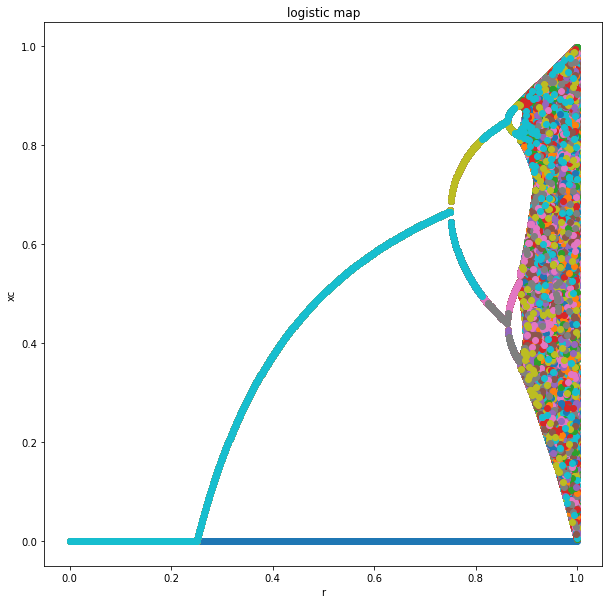

In [14]:
plt.figure(figsize=(10,10))
for i in range(len(x0s)):
  plt.scatter(rs,xcs[i])

plt.xlabel("r")
plt.ylabel("xc")
plt.title("logistic map")
plt.show()

#### Repeating the process for 0.85<r<0.95

In [15]:
focusedRs = np.arange(8500,9500,0.1)/10000

In [16]:
xcs = np.zeros((1000,10000))

In [17]:
focusedXcs = getXcs(x0s,focusedRs,T)

In [18]:
new_xcs = np.round(xcs,decimals=4)

### Plotting:

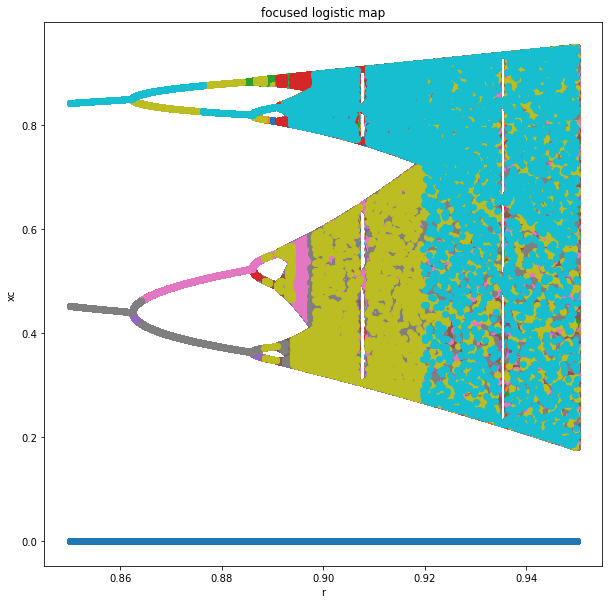

In [19]:
plt.figure(figsize=(10,10))
for i in range(len(x0s)):
  plt.scatter(focusedRs,focusedXcs[i])

plt.xlabel("r")
plt.ylabel("xc")
plt.title("focused logistic map")
plt.show()

## Finding $\delta$ and $\alpha$

In [29]:
counts = np.zeros(len(focusedRs))
for j in range(len(focusedRs)):
    counts[j] = len(set(new_xcs[:,j])) -1

#### finding $a_{n-2}$ ,$a_{n-1}$ ,$a_n$

In [31]:
a_n_2 = list(counts).index(8)
a_n_1 = list(counts).index(16)
a_n = list(counts).index(32)

In [35]:
delta = (focusedRs[a_n_2] - focusedRs[a_n_1])/(focusedRs[a_n_1] - focusedRs[a_n])
print("delta = ", delta)

delta =  3.8265802269043925


#### finding $len(8s)$ ,$len(16s)$

In [36]:
len8s = len(list(new_xcs)) - list(counts).index(8) - list(counts[:-1]).index(8)
len16s = len(list(new_xcs)) - list(counts).index(16) - list(counts[:-1]).index(16)

In [38]:
alpha = len8s/len16s
print("$/alpha$ = ",alpha)

$/alpha$ =  0.23912342893973573
